In [1]:
import numpy as np
from control import *
import matplotlib.pyplot as plt
import sympy as sp
plt.style.use('dark_background')

In [2]:
Os=.25
Ts=1.6
xeta = lambda Os : 1/(np.sqrt(1+((np.pi)/np.log(Os))**2))
w_n = lambda Ts,Os: 4/(xeta(Os)*Ts)

In [3]:
G=tf([1],[1,12,48,64])
G


            1
------------------------
s^3 + 12 s^2 + 48 s + 64

In [24]:
sd=-xeta(Os)*w_n(Ts,Os)+w_n(Ts,Os)*(np.sqrt(1-xeta(Os)**2))*1j

In [25]:
sd

(-2.5+5.6654501772839918j)

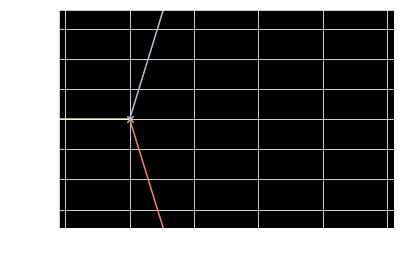

In [26]:
root_locus(G)
plt.grid()
plt.show()

In [28]:
zc=1
phi=180-np.angle(evalfr(G,sd))*180/np.pi
theta=180-np.angle(sd)*180/np.pi
mu_z=np.angle(sd+zc)*180/np.pi
gamma=180-mu_z-theta
pc= (w_n(Ts,Os)*np.sin((gamma+phi)*np.pi/180))/(np.sin((gamma+theta+phi)*np.pi/180))
pc

5.8614788280480763

In [35]:
Gc=tf([1,1],[1,pc])
K=1/(np.abs(evalfr(Gc,sd)*evalfr(G,sd)))

In [36]:
K

226.26746442692311

In [37]:
T=feedback(G,1)
Tc=feedback(K*G*Gc,1)

In [40]:
T


            1
------------------------
s^3 + 12 s^2 + 48 s + 65

In [41]:
Tc


               226.3 s + 226.3
---------------------------------------------
s^4 + 17.86 s^3 + 118.3 s^2 + 571.6 s + 601.4

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


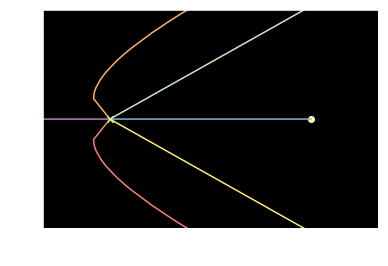

In [45]:
root_locus(Gc*G)
root_locus(G)
plt.axis([-5,0,-5,5])
plt.show()

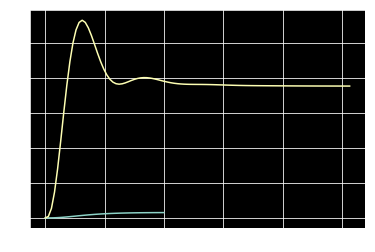

In [49]:
t,y=step_response(T)
t1,y1=step_response(Tc)
plt.plot(t,y)
plt.plot(t1,y1)
plt.grid()
plt.show()

In [66]:
N,D=tfdata(Tc)

In [67]:
N=[N[0][0][i] for i in range(len(N[0][0]))]
D=[D[0][0][i] for i in range(len(D[0][0]))]
D

[1.0,
 17.861478828048078,
 118.33774593657691,
 571.61844817323072,
 601.40210942199997]

In [68]:
sp.residue(N,D)

TypeError: residue() missing 1 required positional argument: 'x0'

In [70]:
gamma=0.5*(180-theta-phi)
pc= (w_n(Ts,Os)*np.sin((gamma+phi)*np.pi/180))/(np.sin((gamma+theta+phi)*np.pi/180))
zc=(w_n(Ts,Os)*np.sin((gamma)*np.pi/180))/(np.sin((gamma+theta+phi)*np.pi/180))

34.149528216240171

In [23]:
g1=tf([1,5],[1,2,0])
g2=tf([1,100],[1,2,0])


g1



  s + 5
---------
s^2 + 2 s

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


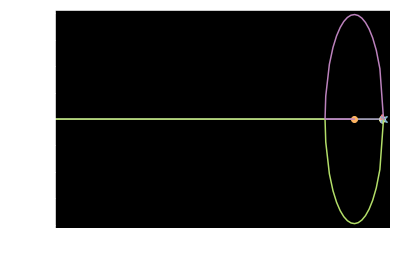

In [24]:
root_locus(g1)
root_locus(g2)
#plt.xlim([-3,0])
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


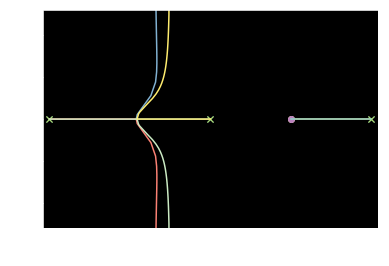

In [25]:
zc= 3.6320782716543052
pc=3.8221077287669738
gc=tf([1,zc],[1,pc])
g=tf([2,1],[1,3,2,0])
k=6.613
a=root_locus(gc*g)
b=root_locus(g)
plt.show()